# Actividad 2

Para la actividad 2 se debe realizar las siguientes tareas:

* Crear una variable Binaria con respecto a la columna SalePrice, en donde 1 sea SalePrice mayor a 214000.000000 y 0 SalePrice Menor a 214000.000000.

* Una vez creada esta variable, se debe generar un modelo supervisado que me pronostique el comportamiento de esta variable binaria. Utilizando las demas columnas del data set.

ES IMPORTANTE QUE EN ESTE MODELO NO SE UTILICE LAS VARIABLES ( Id, SalePrice)

* Los resultados a mostrar seran la importancia de las variables y las metricas de la matriz de confusion.

* Se debe mostrar en un repositorio publico en github  en un jupyter notebook.

Se recomienda usar el dataset con las variables transformadas  y data limpia ( pues esta fue la primera actividad).



### Desarrollado por 

## Carlos Edward Grajales


# Librerias A Utilizar

## Tratamiento de datos

In [2]:
##
## 2021-02-20
## Carlos E. Grajales
##

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


## Graficos

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


## Preprocesado y modelado

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Confusion Matrix
from sklearn.metrics import confusion_matrix
# Accuracy
from sklearn.metrics import accuracy_score
# Recall
from sklearn.metrics import recall_score
# Precision
from sklearn.metrics import precision_score
# F1 Score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor


## Otros

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Fuente de Datos 

Esta fuente de datos traida sacada desde la siguiente direccion https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ contiene datos sobre descripcion y componentes de una vivienda asociada con sus precios 

In [87]:
TRAIN = pd.read_csv("/home/cgrajales/algoritmos/train.csv")
TRAIN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Limpiando data basando en los pasos de la primera actividad

In [88]:
sales_price = TRAIN['SalePrice']
data = TRAIN
Total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Eliminando columnas con mas del 20% de valores nulos

In [89]:
data.drop((missing_data[missing_data['Total'] > 20]).index, axis=1, inplace=True)
print(data.isnull().sum().max())

8


In [90]:
### Reemplazando columnas numericas vacias

numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars','MasVnrArea']

for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
    
### Reemplazando columnas categoricas vacias
    
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual','MasVnrType']

for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])
    
##Verificando si existen nulos    
data.isnull().sum().max()


0

### Creando Variable binaria

La variable binaria se crea con la condicion sobre "SalePrice" donde si el valor es mayo a 214000.0 es 21" de lo contraio es "0"

In [91]:
TRAIN["Binaria"] = np.where(TRAIN['SalePrice']>214000.000000 , 1, 0)

In [92]:
TRAIN

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Binaria
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,0


### Se Obtiene la matriz de correlacion

In [94]:
corrMatrix = TRAIN.corr()
corrMatrix

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Binaria
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.028444
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.103971
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.242263
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.643683
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.087368
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.401734
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.405223
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,0.358007
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.283159
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,-0.016818


### Identificando las columnas que mejor correlacion tienen con respecto a Sales Price

In [96]:
corrMatrix.loc['SalePrice'].sort_values(ascending=False)[:15]

SalePrice       1.000000
OverallQual     0.790982
Binaria         0.778678
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

### Borrando Columnas innecesarias

In [97]:
TRAIN.drop("Id",1,inplace=True)
TRAIN.drop("SalePrice",1,inplace=True)


In [98]:
TRAIN

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Binaria
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,1
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,0
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,0
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,1
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,0


In [99]:
TRAIN.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Binaria
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.247945
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.431968
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


### Definiendo la variables a trabajar
Dada la correlacion de las variables con respecto a la columna "SalePrice" se iniciara el aprendizaje con aquellas variables que tengan una correlacion mayor a 0.6

In [141]:
y_train = TRAIN['Binaria'].astype("int")
x_train = TRAIN.loc[:,["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]]

# DecisionTreeClassifier

In [146]:
treeDecision = DecisionTreeClassifier(criterion='entropy',min_samples_split=20,min_samples_leaf=10,max_depth = 6)
dsc=treeDecision.fit(x_train, y_train)


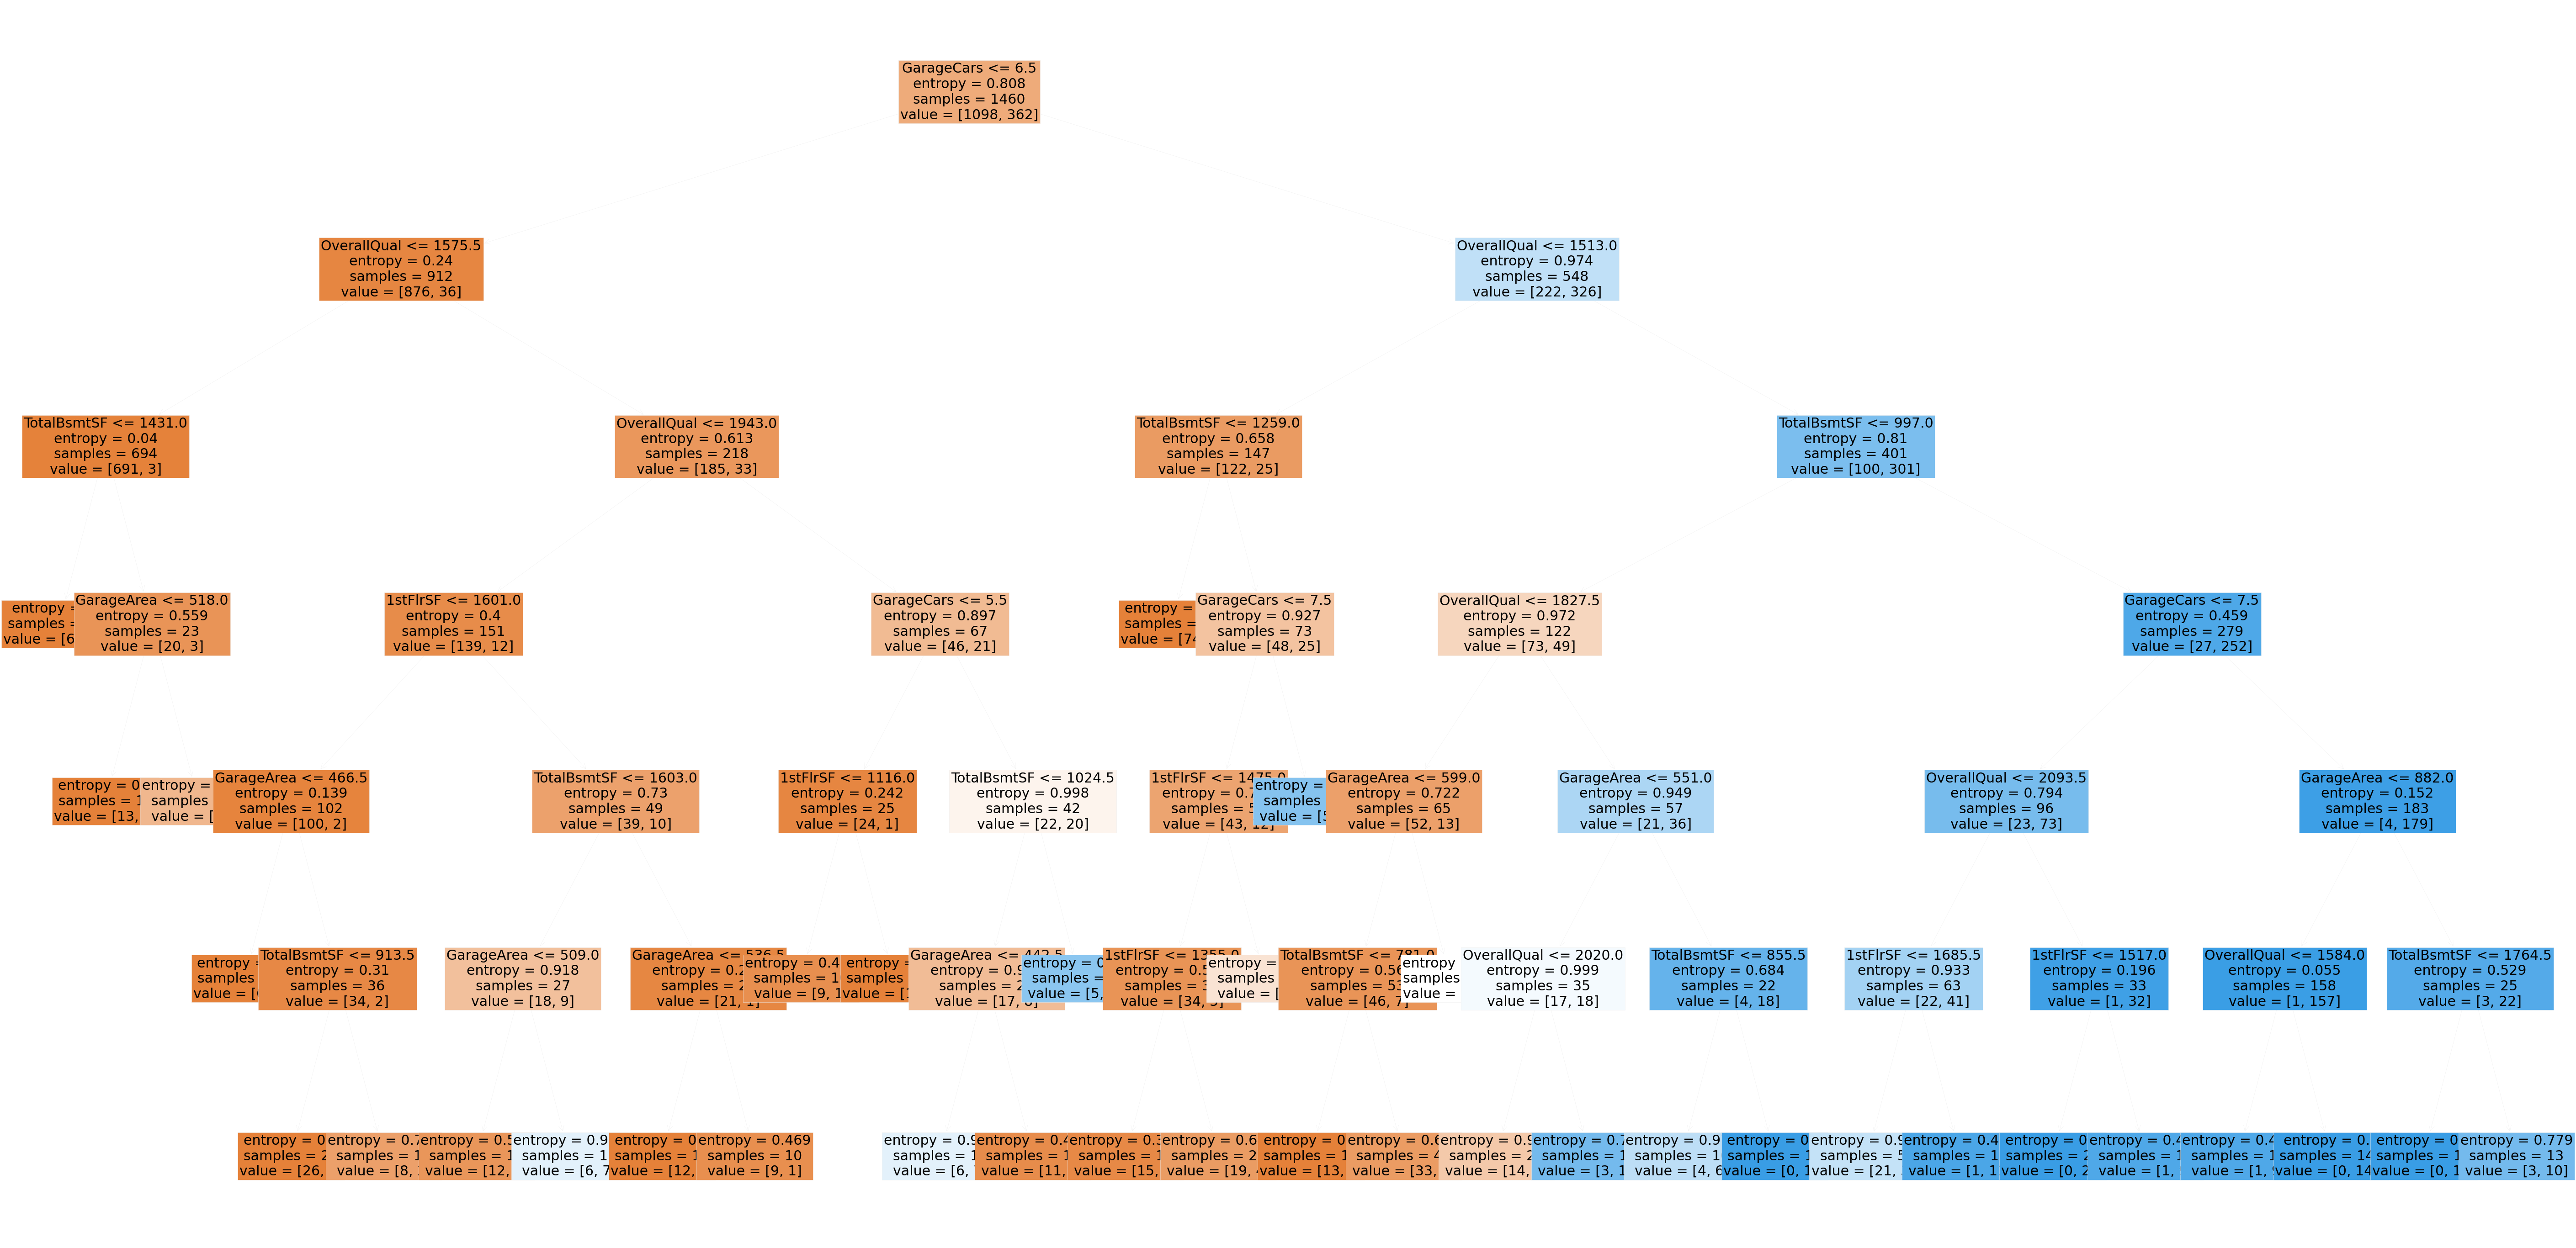

In [172]:
tree.plot_tree(dsc, filled=1,fontsize=30,feature_names=("GarageCars","OverallQual","GrLivArea","GarageArea","TotalBsmtSF","1stFlrSF"))
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

In [166]:
confusion_matrix(y_train, dsc.predict(x_train))

array([[1042,   56],
       [  43,  319]])

In [167]:
accuracy_score(y_train, dsc.predict(x_train))

0.9321917808219178

In [168]:
recall_score(y_train, dsc.predict(x_train))

0.8812154696132597

In [169]:
precision_score(y_train, dsc.predict(x_train))

0.8506666666666667

In [170]:
f1_score(y_train, dsc.predict(x_train))

0.8656716417910447

In [171]:
target_names = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]
print(classification_report(y_train, dsc.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1098
           1       0.85      0.88      0.87       362

    accuracy                           0.93      1460
   macro avg       0.91      0.92      0.91      1460
weighted avg       0.93      0.93      0.93      1460



Con este primer algoritmo de aprendizaje, se obtiene que:
* Las medidas de Accuracy, recall, precision, f1 se encuntran por encima del 85% lo que nos indica una medida interesante para determinar que el modelo realiza predicciones de forma adecuada, sin embargo se considera importante evaluar mas modelos debido al desbalance que se encuentra en la data (362 positivos, 1098 negativos)

## Curva ROC

In [174]:
probas = dsc.predict_proba(x_train)

In [180]:

# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 60
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

Aplicando la curva ROC nos da un AUC de 0.983 lo que nos indica que segun este modelo el valor diagnostico final es muy bueno.

# Gradient Boost

In [206]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(x_train, y_train)

In [207]:
clf.score(x_train, y_train)

0.9465753424657535

In [208]:
confusion_matrix(y_train, clf.predict(x_train))

array([[1068,   30],
       [  48,  314]])

In [209]:
target_names = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"]
print(classification_report(y_train, clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1098
           1       0.91      0.87      0.89       362

    accuracy                           0.95      1460
   macro avg       0.93      0.92      0.93      1460
weighted avg       0.95      0.95      0.95      1460



Al Igual que con el arbol de desicion, en este caso los indicadores de precision, recall  f1 y accuraccy dan altos por encima del 86% un indicador de aprendizaje y prediccion altos

# Conclusion

* Los modelos utilizados arrojaron como resultado indicadores altos que llevan a pensar que el modelo se encuentra bien, sin embargo se debe analizar la cantidad de data disponible y los valores desbalanceados.
* Los datos son realmente pocos (1460) y una data desbalanceada con respecto a la variable objetivo. Esto puede hacer que los procesos de aprendizajes muestren indicadores alterados.
* Se deberia en este caso explorar alternativas como de transformar la data para obtener valores finales un poco mas balanceados, o la de obtener mas registros y asi ganar mas fiabilidad en la precision.

